<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Check-Data" data-toc-modified-id="Check-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Check Data</a></span><ul class="toc-item"><li><span><a href="#Check-general-informatioin" data-toc-modified-id="Check-general-informatioin-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check general informatioin</a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data visualization</a></span></li></ul></li><li><span><a href="#ML-model-building" data-toc-modified-id="ML-model-building-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ML model building</a></span><ul class="toc-item"><li><span><a href="#Data-preparation-for-models" data-toc-modified-id="Data-preparation-for-models-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data preparation for models</a></span></li><li><span><a href="#Popular-of-all-users-recommendation" data-toc-modified-id="Popular-of-all-users-recommendation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Popular of all users recommendation</a></span></li><li><span><a href="#Popular-by-every-user-recommendation" data-toc-modified-id="Popular-by-every-user-recommendation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Popular by every user recommendation</a></span></li></ul></li><li><span><a href="#Формирование-submit" data-toc-modified-id="Формирование-submit-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Формирование submit</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

#  Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Import Data

In [2]:
sample = pd.read_csv(r'C:\Users\vasni\OneDrive\Рабочий стол\sber_market_test\sample_submission.csv')#, sep=';')
train = pd.read_csv(r'C:\Users\vasni\OneDrive\Рабочий стол\sber_market_test\train.csv')

<div class="alert alert-info">
<h1>Комментарий  <a class="tocSkip"></a></h1>
Я рассмотрел несколько подходов к решению кейса.<br/>
1 - можно выделить общий тренд покупок по всем пользователям и основывать рекомендательную систему на этих данных<br/>
2 - рекомендовать к покупке товар, который преобретался определенным пользователем наибольшее кол-во раз<br/>
Так же можно рекомендовать относительно последних покупок пользователя, однако я считаю оптимальным делать по минимальному тз и, как следующих шаг, проводить A/B тестирование, считать конверсию по рекомендательной корзине, этот шаг описан для общего представления о выбранном подходе и в данной работе рассмотрен не будет(за неимением такой возможности)
</div>

# Check Data

## Check general informatioin 

In [3]:
def check_data(data):
    display(data.head())
    display(data.info())
    display('Проверим пропущенные значения')
    display(data.isna().sum())
    display('Проверим уникальные значния в признаках')
    display(data.nunique())

In [4]:
check_data(train)

,user_id,order_completed_at,cart
0,2,2015-03-22 09:25:46,399
1,2,2015-03-22 09:25:46,14
2,2,2015-03-22 09:25:46,198
3,2,2015-03-22 09:25:46,88
4,2,2015-03-22 09:25:46,157


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123064 entries, 0 to 3123063
Data columns (total 3 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   user_id             int64 
 1   order_completed_at  object
 2   cart                int64 
dtypes: int64(2), object(1)
memory usage: 71.5+ MB


None

'Проверим пропущенные значения'

user_id               0
order_completed_at    0
cart                  0
dtype: int64

'Проверим уникальные значния в признаках'

user_id                20000
order_completed_at    208155
cart                     881
dtype: int64

In [5]:
sample['target'].value_counts()

1    395855
0    394594
Name: target, dtype: int64

In [6]:
train['order_completed_at'] = pd.to_datetime(train['order_completed_at'], format="%Y-%m-%d %H:%M:%S")

# Data analysis

<div class="alert alert-info">
<h1>Комментарий  <a class="tocSkip"></a></h1>
Посмотрим на общую тенденцую покупок
</div>

In [7]:
def data_analysis(data):
    display('Товары, которые чаще всего попадали в корзину с 2015 по 2020')
    display('Среднее по каждому товару', round(data['cart'].value_counts().mean(), 2))
    general_trend = data['cart'].value_counts().head()
    display(general_trend)
    display('Общая тенденция покупок с 2015 по 2020')
    general_trend = data.groupby('order_completed_at')['cart'].count().to_frame()
    plt.figure()
    general_trend.plot()
    plt.show()

'Товары, которые чаще всего попадали в корзину с 2015 по 2020'

'Среднее по каждому товару'

3544.91

57     108877
14      93957
61      91543
398     81694
23      71837
Name: cart, dtype: int64

'Общая тенденция покупок с 2015 по 2020'

<Figure size 432x288 with 0 Axes>

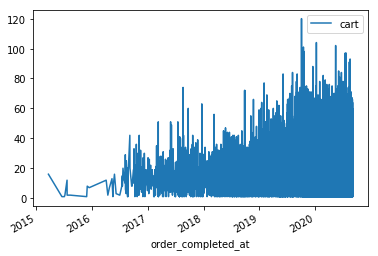

In [8]:
data_analysis(train)

<div class="alert alert-info">
<h1>Комментарий  <a class="tocSkip"></a></h1>
Видим общую тенденцию к росту<br/>
Проверим динамику наиболее продаваемых товаров за все время
</div>

In [10]:
visualization_data = train['cart'].value_counts().head().to_frame()
index = visualization_data.index.values.tolist()

In [11]:
visualization_by_year = train.copy()
visualization_by_year['year'] = visualization_by_year['order_completed_at'].dt.year
visualization_by_year = visualization_by_year.drop(['user_id', 'order_completed_at'], axis=1).set_index('year')

In [12]:
visualization_by_year.groupby('year').count()

,cart
year,
2015,52
2016,1375
2017,8938
2018,25464
2019,603398
2020,2483837


## Data visualization

'Динамика продаж товара с индексом 57'

<Figure size 432x288 with 0 Axes>

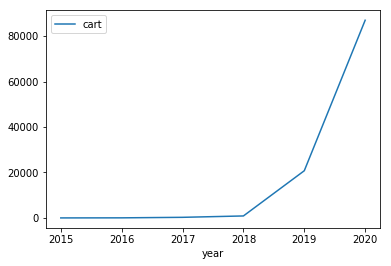

'Динамика продаж товара с индексом 14'

<Figure size 432x288 with 0 Axes>

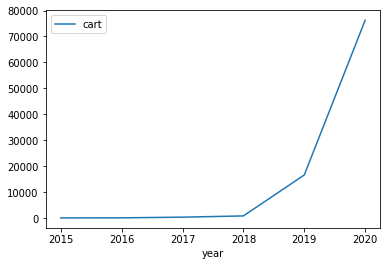

'Динамика продаж товара с индексом 61'

<Figure size 432x288 with 0 Axes>

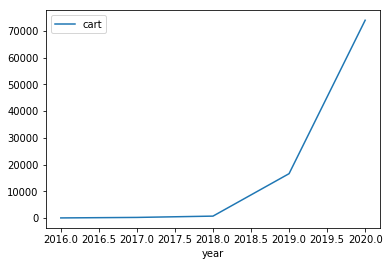

'Динамика продаж товара с индексом 398'

<Figure size 432x288 with 0 Axes>

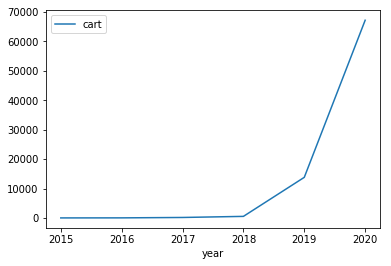

'Динамика продаж товара с индексом 23'

<Figure size 432x288 with 0 Axes>

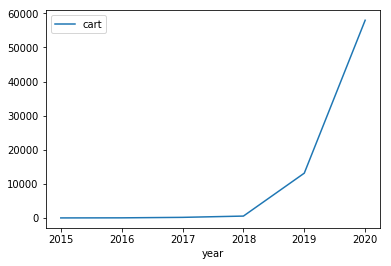

In [13]:
for ind in index:
    display(f'Динамика продаж товара с индексом {ind}')
    plt.figure()
    visualization_by_year.loc[visualization_by_year['cart'] == ind].groupby('year').count().plot()
    plt.show()

<div class="alert alert-info">
<h1>Комментарий  <a class="tocSkip"></a></h1>
По наиболее продаваемым категориям товаров видим экспоненциальный рост<br/>
По исходным данным (и по общей тенденции рынка) нет предпосылок для снижения продаж по этим товарам, значит топ продоваемых можно рекомендовать к продаже 
</div>

# ML model building 

## Data preparation for models

In [14]:
class Data_preparation_models:
    """Класс подготавливает данные, делает их предобработку, и возвращает результат, который оценивается в следующих шагах"""
    def __init__(self, train):
        """"Определяет все датафреймы"""
        self.train = train

    def train_data_preparation(self, data):
        ''''По этим данным будем предсказывать последнюю покупку'''
        #выбираем последнию дату покупки у каждого юзера
        data_oflast_purchase = data.groupby(["user_id"])["order_completed_at"].max().to_frame().reset_index()
        #создаем столбец, заполняем его единицами,чтобы потом сопоставить с полным датафреймом
        data_oflast_purchase['last_pur_day'] = 1
    
        # соединяем основной дф с последним днем, в train оставляем все дни, кроме последнего-по каждому юзеру
        train = pd.merge(data, data_oflast_purchase, on=["order_completed_at", "user_id"], how="left")
        train = train[train["last_pur_day"] != 1]
        train = train.drop(["last_pur_day"], axis=1)
    
    
        data_oflast_purchase = data_oflast_purchase.drop(['last_pur_day'], axis=1)
        last_cart_by_user = pd.merge(data_oflast_purchase, data, on=["user_id", "order_completed_at"], how="left")
        last_cart_by_user['count'] = 1
        #тут будут все покупки юзера без даты(все товары,которые он когда либо покупал)
        all_purchases = data.groupby("user_id")["cart"].unique().to_frame().reset_index().explode("cart")
    
        target = pd.merge(all_purchases, last_cart_by_user.drop(columns=["order_completed_at"]), on=["user_id","cart"], how="left")
        target.fillna(0, inplace=True)
        target['count'] = target['count'].astype(int)
        target = target.rename(columns={"count":"target"})
        
        return train, target
    
    def most_popular_in_common(self, train, target, k):
        ''''Будет рекомендовать наиболее популярные товары, k - кол-во популярных товаров, перебирать как гиперпараметр'''     
        most_popular = train['cart'].value_counts().head(k).to_frame()
        result = target.copy()
        result['predict'] = np.where(result.cart.isin(most_popular.index), 1, 0)
    
        return result
    
    def most_popular_in_own_history(self, train, target, k):
        '''Будет рекомендовать те покупки, которые юзер чаще всего совершал ранее, k - кол-во популярных товаров, перебирать как гиперпараметр'''
        most_popular = train.groupby("user_id")["cart"].value_counts().to_frame().rename(columns={"cart":"count"})\
            .groupby("user_id")["count"].head(k).to_frame().reset_index().drop(columns=["count"])
        most_popular['predict'] = 1
        result = target.copy()
        result = result.merge(most_popular, how='left', on=['user_id', 'cart'])
        result['predict'] = result['predict'].fillna(0).astype(int)
    
        return result

In [15]:
research = Data_preparation_models(train)

In [16]:
train, target = research.train_data_preparation(train)

## Popular of all users recommendation

In [17]:
best_results = {}
for i in range(5, 1000, 100):
    train_res = research.most_popular_in_common(train, target, k = i)
    best_results[i]= [f1_score(train_res["target"], train_res["predict"])]
display(pd.DataFrame(best_results).max().to_frame().sort_values(0, ascending=False).head(1))

,0
105,0.431511


In [18]:
train_res_test = research.most_popular_in_common(train, target, k = 105)

In [19]:
f1_score(train_res_test["target"], train_res_test["predict"])

0.43151129288264894

<div class="alert alert-info">
<h1>Комментарий  <a class="tocSkip"></a></h1>
Проверим модель на вменяемость, заполним предикт рандомно 1 или 0
</div>

In [20]:
train_res_test['predict'] = np.random.randint(0, 2, train_res_test.shape[0])

In [21]:
f1_score(train_res_test["target"], train_res_test["predict"])

0.33526689043520513

In [22]:
train_res_test["predict"].value_counts()

0    559119
1    558481
Name: predict, dtype: int64

<div class="alert alert-info">
<h1>Комментарий  <a class="tocSkip"></a></h1>
Тут можно было бы перебирать grid search с scooring = f1, но я решил реализовать простой цикл перебора, чтобы показать понимание процесса.<br/>
Вывод:<br/>
    Лучшее значение f1 меры имеем на 500 товарах, в смысле если рекомендовать 500 топ товаров - то мы будем получать значение f1 меры равно 0.419
</div>

## Popular by every user recommendation

In [23]:
best_results_own = {}
for i in range(5, 50, 5):
    train_res_1 = research.most_popular_in_own_history(train, target, k = i)
    best_results_own[i]= [f1_score(train_res["target"], train_res["predict"])]

display(pd.DataFrame(best_results_own).max().to_frame().sort_values(0, ascending=False).head(1))

,0
5,0.401904


# Формирование submit 

In [24]:
sample = pd.read_csv(r'C:\Users\vasni\OneDrive\Рабочий стол\sber_market_test\sample_submission.csv')

In [25]:
sample[['id', 'cart']] = pd.DataFrame(sample.id.str.split(';').tolist())

In [26]:
sample = sample.drop(['target'], axis=1)

<div class="alert alert-info">
<h1>Комментарий  <a class="tocSkip"></a></h1>
Применим алгоритм, который показал наибольшую точность, по истории всех покупок
</div>

In [27]:
def most_popular_in_common(submit, k):
        ''''Будет рекомендовать наиболее популярные товары, k - кол-во популярных товаров, перебирать как гиперпараметр'''     
        most_popular = sample['cart'].value_counts().head(k).to_frame()
        submit['target'] = np.where(submit.cart.isin(most_popular.index), 1, 0)
    
        return submit

In [28]:
submit = most_popular_in_common(sample, k=30)

<div class="alert alert-info">
<h1>Комментарий  <a class="tocSkip"></a></h1>
k подбирал относительно того, что на тренировочной выборке лучший результат у 100, при соотненении размеров выборки получил 30
    <br/>
классы сбалансированы при k = 55
</div>

In [29]:
submit

,id,cart,target
0,0,133,0
1,0,5,1
2,0,10,0
3,0,396,0
4,0,14,1
...,...,...,...
790444,19998,26,0
790445,19998,31,0
790446,19998,29,0
790447,19998,798,1


# Вывод

<div class="alert alert-info">
<h1>Комментарий  <a class="tocSkip"></a></h1>
В ходе проделаной работы были разработаны две системы рекомендательные системы<br/>
    <br/>
Рекомендовать топ покупаемых товаров в целом: лучшее значение f1 меры = 0.431<br/>
Рекомендовать топ покупаемых товаров в личной истории покупок: лучшее значение f1 меры = 0.401<br/>
    <br/>
    f1 мера была выбрана как наиболее оптимальная, чтобы определеить среднее между recall & precision<br/>
    Дальнейшая работа предполагает более тщатаельной проработки тенденций, проведение a\b тестов.<br/>
    <br/>
    Классы в работе были использованы исходя из предположения, что проект будет развиваться и должен быть поддерживаемым, понятно, что для такой короткой работы в общем виде классы не нужны
</div>